# Exercise 7: Clustering the fish data

Now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

From the course _Transition to Data Science_. [Buy the entire course for just $10](https://www.udemy.com/transition-to-data-science-in-python/?couponCode=CLUSTER-NBS) for many more exercises and helpful video lectures.

**Step 1:** Load the dataset, extracting the species of the fish as a list `species` _(done for you)_

In [19]:
import pandas as pd

df = pd.read_csv('../datasets/fish.csv')

# remove the species from the DataFrame so only the measurements are left
species = list(df['species'])
del df['species']

**Step 2:** Build the pipeline as in the previous exercise _(filled in for you)._

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler=StandardScaler(df)
kmeans=KMeans(n_clusters=4)
pipeline=make_pipeline(StandardScaler(),KMeans())
pipeline

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

**Step 3:** Fit the pipeline to the fish measurements `samples`.

In [23]:
samples=pipeline.fit(df)
samples##pipeline??

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

**Step 4:** Obtain the cluster labels for `samples` by using the `.predict()` method of `pipeline`, assigning the result to `labels`.

In [10]:
labels=pipeline.predict(df)

**Step 5:** Using `pd.DataFrame()`, create a DataFrame `df` with two columns named `'labels'` and `'species'`, using `labels` and `species`, respectively, for the column values.

In [12]:
df=pd.DataFrame({'labels':labels,'species':species})

**Step 6:** Using `pd.crosstab()`, create a cross-tabulation `ct` of `df['labels']` and `df['species']`.

In [13]:
pd.crosstab(df['labels'],df['species'],margins=True)

species,Bream,Pike,Roach,Smelt,All
labels,,,,,
0,0,7,0,0,7
1,0,0,19,1,20
2,14,0,0,0,14
3,0,0,0,13,13
4,0,4,0,0,4
5,0,6,0,0,6
6,13,0,1,0,14
7,7,0,0,0,7
All,34,17,20,14,85


**Step 7:** Display your cross-tabulation, and check out how good your clustering is!

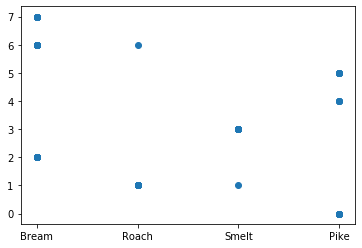

In [15]:
##分成八类？？
import matplotlib.pyplot as plt 
plt.scatter(species,labels)